<a href="https://colab.research.google.com/github/DaudRasheed/Trafffic_sign_detector/blob/main/Traffic_Sign_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importing libraries

In [1]:
import os

In [2]:
import glob

In [3]:
from IPython.display import Image, display

#Checking GPU

In [4]:
!nvidia-smi

Sat Aug 19 11:01:21 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#MOunting Google Drive

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
cd '/content/drive/MyDrive/Road_signs Detector'

/content/drive/MyDrive/Road_signs Detector


In [13]:
HOME = os.getcwd()

In [14]:
print(HOME)

/content/drive/MyDrive/Road_signs Detector


#Installing Ultralytics

In [15]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 7.6 MB/s eta 0:00:00


In [16]:
import ultralytics

In [17]:
ultralytics.checks()

Ultralytics YOLOv8.0.157 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [22]:
cd '/content/drive/MyDrive/Road_signs Detector/Dataset'

/content/drive/MyDrive/Road_signs Detector/Dataset


#Downloading Dataset

In [23]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="********************")
project = rf.workspace("psau-qzpwf").project("triffic-sgin1")
dataset = project.version(4).download("yolov5")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.3 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=6d0b378aef794f4caa6cd235076e809e8f738d5865b355f76e316ca0721b2569
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      

loading Roboflow workspace...
loading Roboflow project...

Extracting Dataset Version Zip to triffic-sgin1-4 in yolov5pytorch:: 100%|██████████| 4376/4376 [00:25<00:00, 172.10it/s]


In [24]:
%cd {HOME}

/content/drive/MyDrive/Road_signs Detector


# Traing Out Model

In [26]:
!yolo task=detect mode=train model=yolov8s.pt data='/content/drive/MyDrive/Road_signs Detector/Dataset/triffic-sgin1-4/data.yaml' epochs=100 imgsz=640

100% 21.5M/21.5M [00:00<00:00, 130MB/s] 
Ultralytics YOLOv8.0.157 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Road_signs Detector/Dataset/triffic-sgin1-4/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None,

#Checking Files in Training directory

In [29]:
!ls '/content/drive/MyDrive/Road_signs Detector/runs/detect/train'

args.yaml					    train_batch1.jpg
confusion_matrix_normalized.png			    train_batch2.jpg
confusion_matrix.png				    train_batch9630.jpg
events.out.tfevents.1692444372.e5a2a51da733.7518.0  train_batch9631.jpg
F1_curve.png					    train_batch9632.jpg
labels_correlogram.jpg				    val_batch0_labels.jpg
labels.jpg					    val_batch0_pred.jpg
P_curve.png					    val_batch1_labels.jpg
PR_curve.png					    val_batch1_pred.jpg
R_curve.png					    val_batch2_labels.jpg
results.csv					    val_batch2_pred.jpg
results.png					    weights
train_batch0.jpg


#Printing Confusion Matrix

In [30]:
from IPython.display import Image

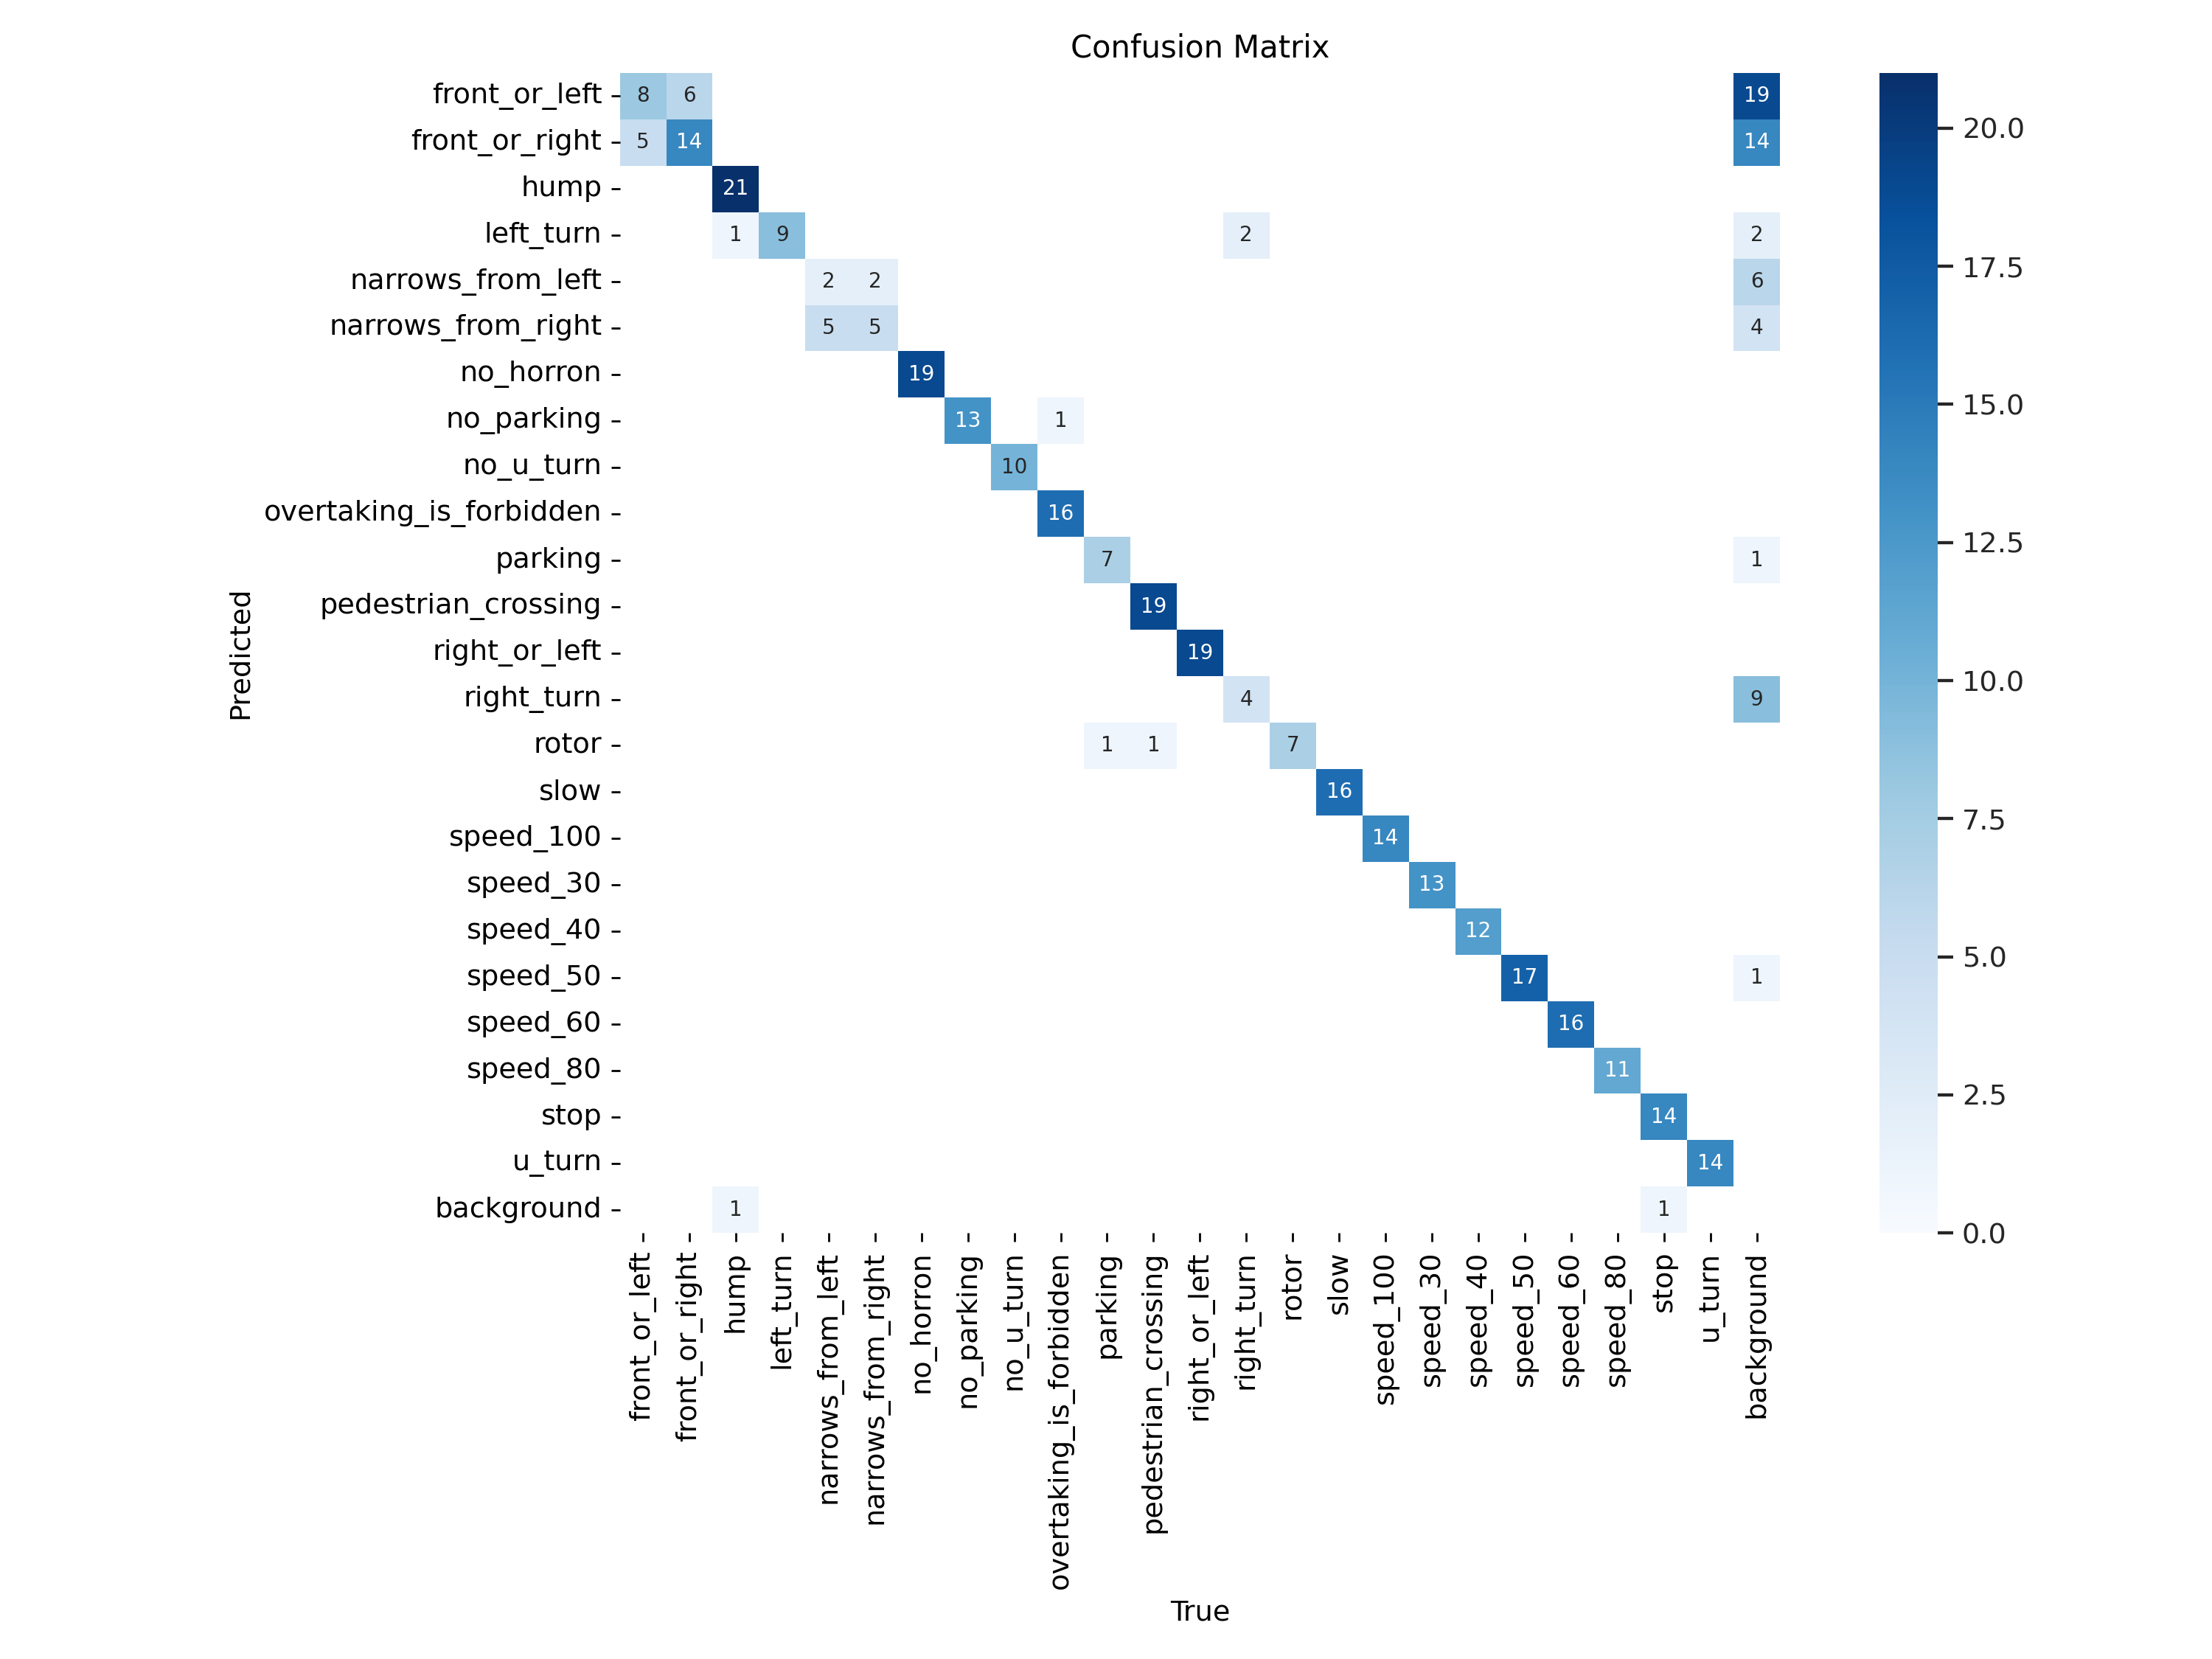

In [32]:
Image(filename='/content/drive/MyDrive/Road_signs Detector/runs/detect/train/confusion_matrix.png')

#Checking Model Prediction on validation Batch

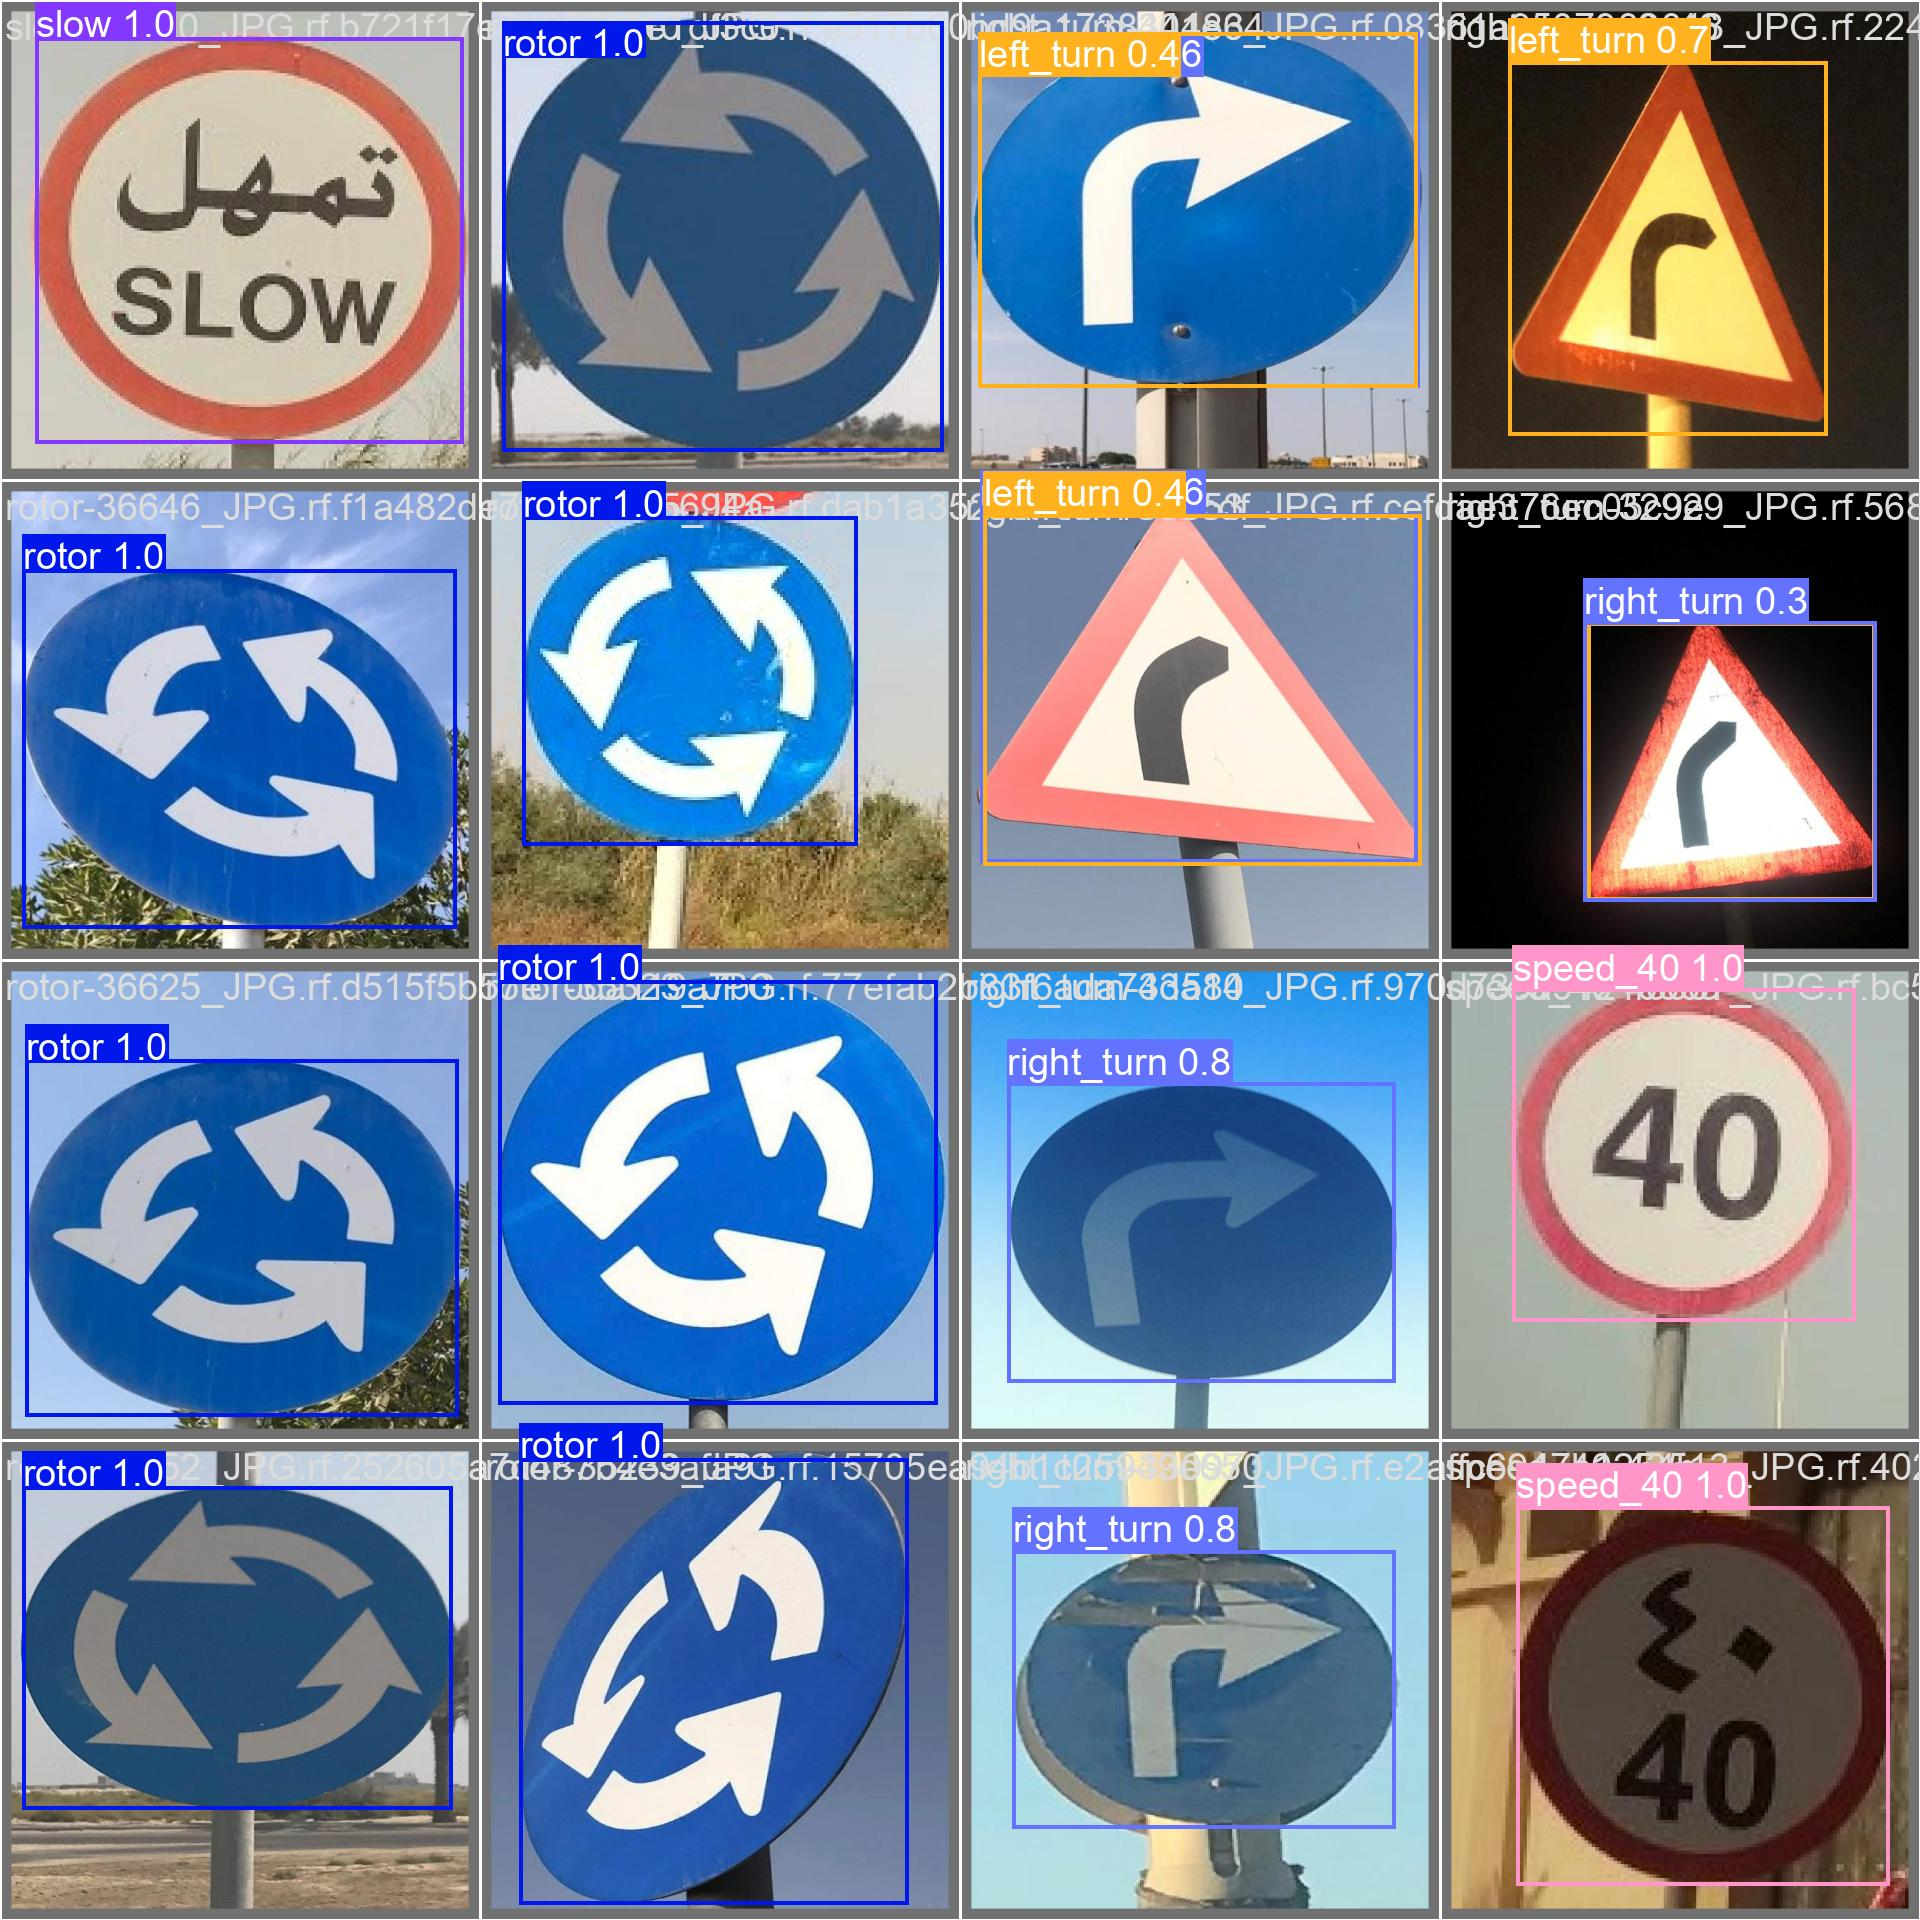

In [33]:
Image(filename='/content/drive/MyDrive/Road_signs Detector/runs/detect/train/val_batch2_pred.jpg',height=500)

# Printing Validation and Training Loss

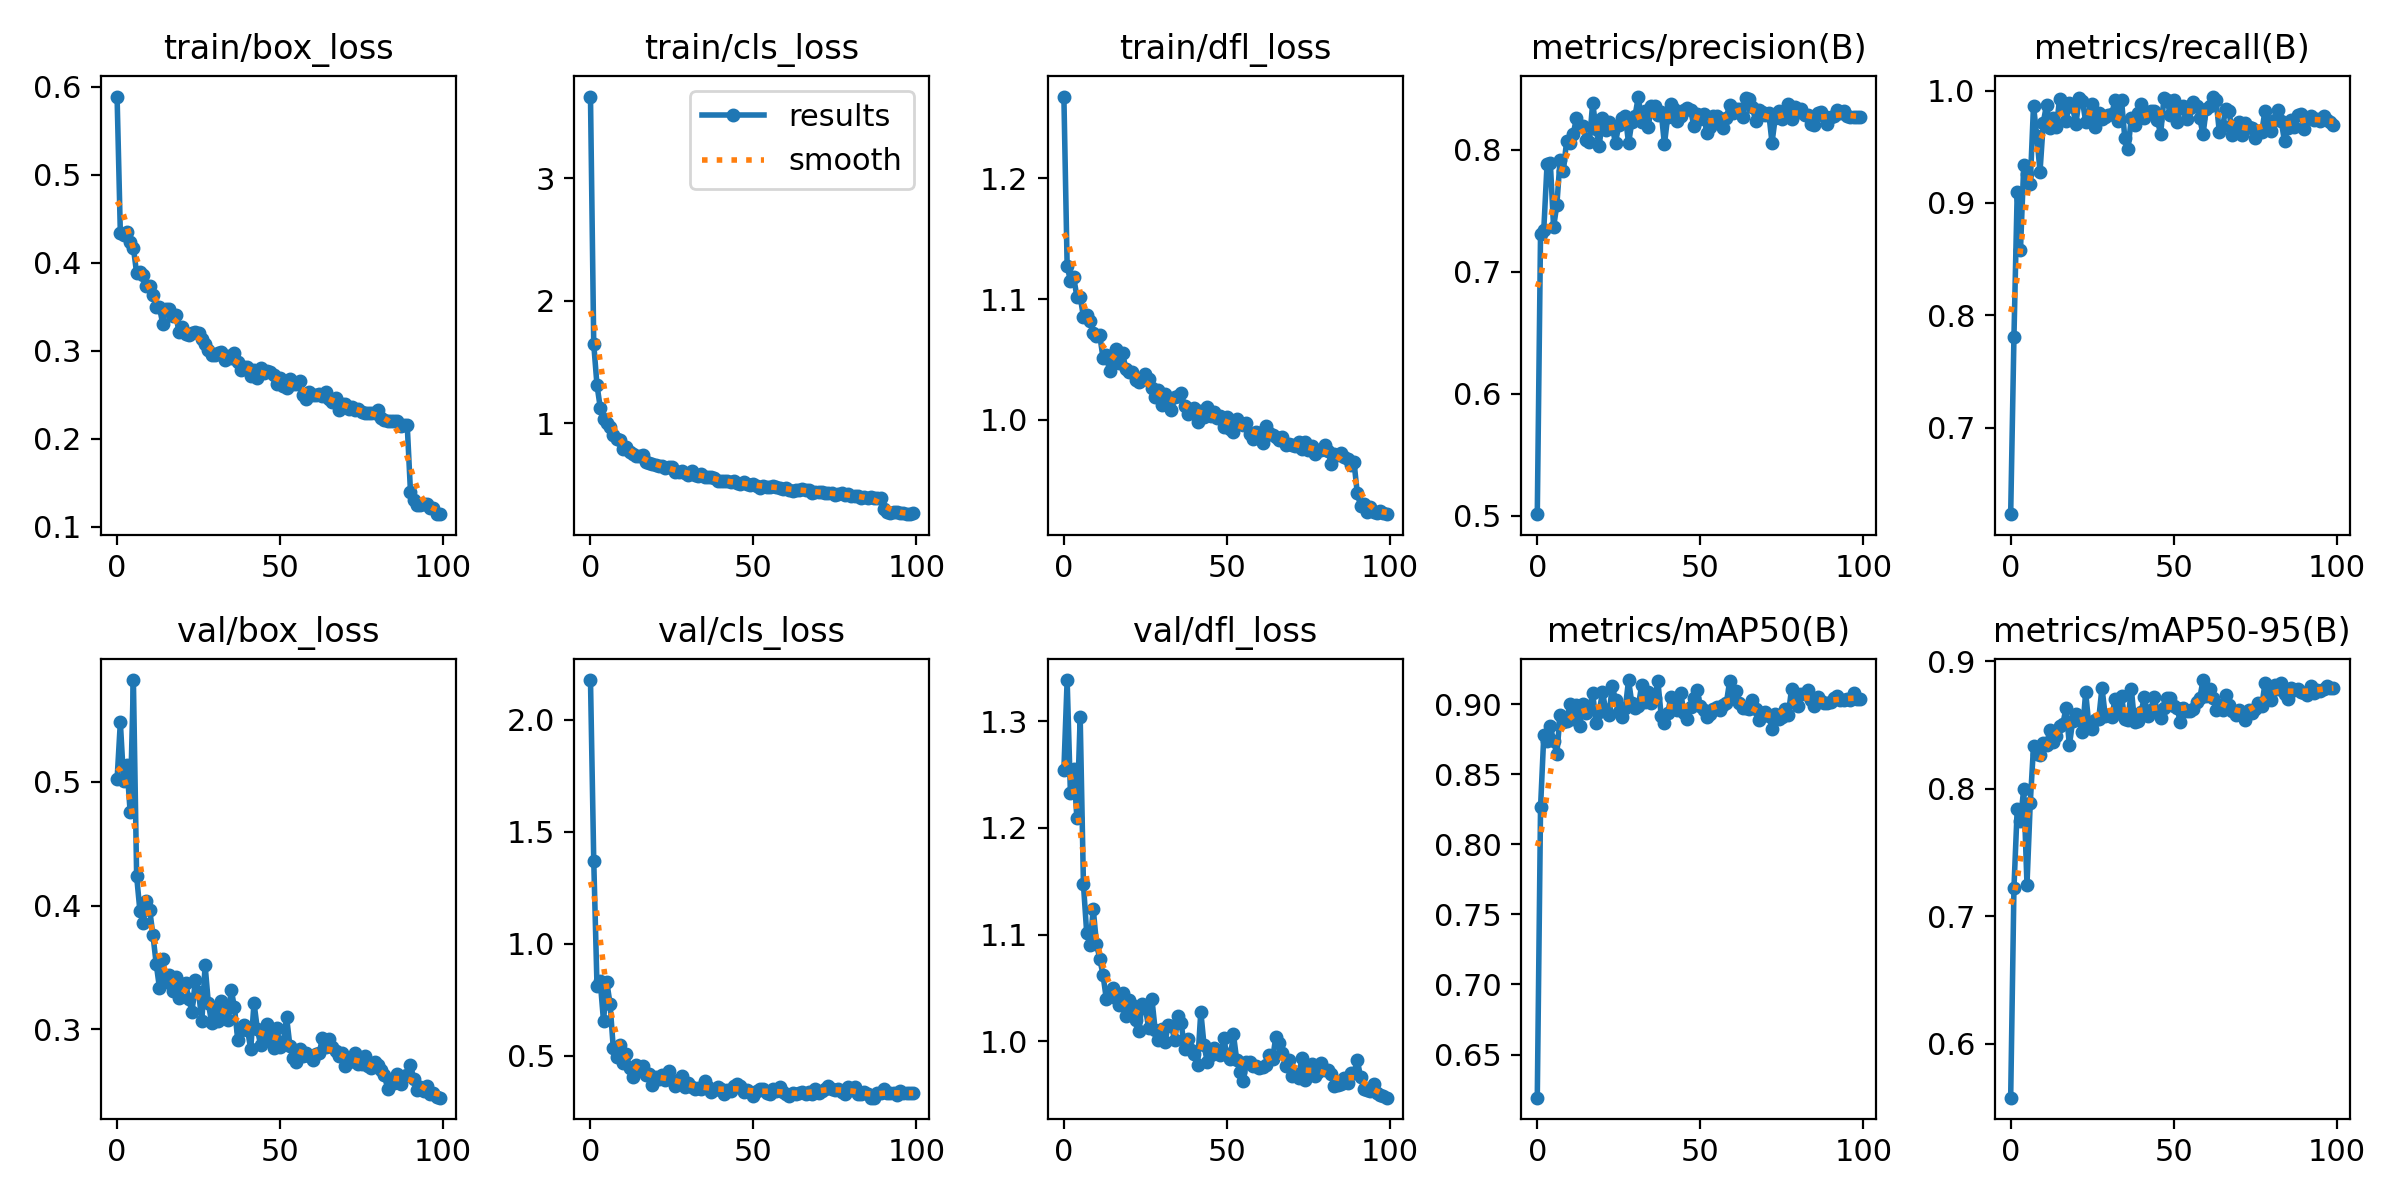

In [34]:
Image(filename='/content/drive/MyDrive/Road_signs Detector/runs/detect/train/results.png',height=500)

# Validating Custom Model

In [35]:
!yolo task=detect mode=val model='/content/drive/MyDrive/Road_signs Detector/runs/detect/train/weights/best.pt' data='/content/drive/MyDrive/Road_signs Detector/Dataset/triffic-sgin1-4/data.yaml'

Ultralytics YOLOv8.0.157 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11134872 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/Road_signs Detector/Dataset/triffic-sgin1-4/valid/labels.cache... 326 images, 2 backgrounds, 0 corrupt: 100% 326/326 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 21/21 [00:08<00:00,  2.53it/s]
                   all        326        326      0.837      0.962      0.916      0.885
         front_or_left        326         13      0.394          1      0.392      0.383
        front_or_right        326         20      0.601          1      0.743      0.701
                  hump        326         23      0.973      0.913      0.989      0.925
             left_turn        326          9       0.67          1      0.835      0.821
     narrows_from_left        326          7      0.576      0.857      0.776      0.768
    narrows_f